# Evolver Loop 1: Data Analysis & Strategy Development

## Objectives
1. Analyze data characteristics to identify feature engineering opportunities
2. Understand target distribution and class relationships
3. Identify patterns that winning solutions exploited
4. Develop specific feature engineering strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load data
train = pd.read_csv('/home/data/train.csv')
test = pd.read_csv('/home/data/test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"\nTrain columns: {list(train.columns)}")
print(f"Test columns: {list(test.columns)}")

Train shape: (750000, 10)
Test shape: (250000, 9)

Train columns: ['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']
Test columns: ['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']


=== TARGET ANALYSIS ===
Number of fertilizer classes: 7
Target distribution:
Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64

Min class count: 92317
Max class count: 114436
Mean class count: 107142.9
Std class count: 9378.2


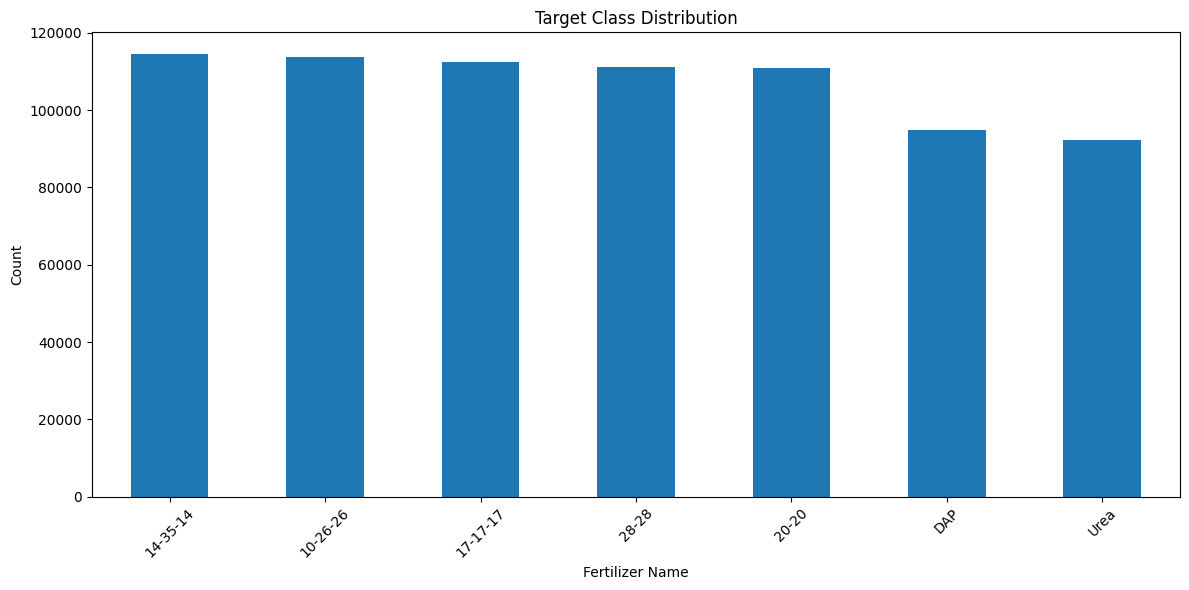

In [2]:
# Basic data characteristics
print("=== TARGET ANALYSIS ===")
print(f"Number of fertilizer classes: {train['Fertilizer Name'].nunique()}")
print(f"Target distribution:")
target_counts = train['Fertilizer Name'].value_counts()
print(target_counts.head(10))
print(f"\nMin class count: {target_counts.min()}")
print(f"Max class count: {target_counts.max()}")
print(f"Mean class count: {target_counts.mean():.1f}")
print(f"Std class count: {target_counts.std():.1f}")

# Check for class imbalance
plt.figure(figsize=(12, 6))
target_counts.plot(kind='bar')
plt.title('Target Class Distribution')
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
# Feature analysis
print("=== FEATURE ANALYSIS ===")

# Numerical features
numerical_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
print(f"Numerical features: {numerical_features}")

for col in numerical_features:
    print(f"\n{col}:")
    print(f"  Train - min: {train[col].min()}, max: {train[col].max()}, mean: {train[col].mean():.2f}, std: {train[col].std():.2f}")
    print(f"  Test  - min: {test[col].min()}, max: {test[col].max()}, mean: {test[col].mean():.2f}, std: {test[col].std():.2f}")
    print(f"  Unique values in train: {train[col].nunique()}")
    print(f"  Unique values in test: {test[col].nunique()}")

# Categorical features
categorical_features = ['Soil Type', 'Crop Type']
print(f"\n=== CATEGORICAL FEATURES ===")
for col in categorical_features:
    print(f"\n{col}:")
    print(f"  Train unique values: {train[col].nunique()}")
    print(f"  Test unique values: {test[col].nunique()}")
    print(f"  Train values: {train[col].unique()}")
    print(f"  Test values: {test[col].unique()}")
    
    # Check for unseen categories in test
    train_cats = set(train[col].unique())
    test_cats = set(test[col].unique())
    unseen = test_cats - train_cats
    if unseen:
        print(f"  ⚠️  Unseen categories in test: {unseen}")
    else:
        print(f"  ✓ All test categories seen in train")

=== FEATURE ANALYSIS ===
Numerical features: ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

Temparature:
  Train - min: 25, max: 38, mean: 31.50, std: 4.03
  Test  - min: 25, max: 38, mean: 31.49, std: 4.02
  Unique values in train: 14
  Unique values in test: 14

Humidity:


  Train - min: 50, max: 72, mean: 61.04, std: 6.65
  Test  - min: 50, max: 72, mean: 61.05, std: 6.64
  Unique values in train: 23
  Unique values in test: 23

Moisture:
  Train - min: 25, max: 65, mean: 45.18, std: 11.79
  Test  - min: 25, max: 65, mean: 45.19, std: 11.79
  Unique values in train: 41
  Unique values in test: 41

Nitrogen:
  Train - min: 4, max: 42, mean: 23.09, std: 11.22
  Test  - min: 4, max: 42, mean: 23.14, std: 11.22
  Unique values in train: 39
  Unique values in test: 39

Potassium:


  Train - min: 0, max: 19, mean: 9.48, std: 5.77
  Test  - min: 0, max: 19, mean: 9.49, std: 5.77
  Unique values in train: 20
  Unique values in test: 20

Phosphorous:
  Train - min: 0, max: 42, mean: 21.07, std: 12.35
  Test  - min: 0, max: 42, mean: 21.12, std: 12.38
  Unique values in train: 43
  Unique values in test: 43

=== CATEGORICAL FEATURES ===

Soil Type:
  Train unique values: 5
  Test unique values: 5
  Train values: ['Clayey' 'Sandy' 'Red' 'Loamy' 'Black']
  Test values: ['Sandy' 'Red' 'Clayey' 'Black' 'Loamy']
  ✓ All test categories seen in train

Crop Type:
  Train unique values: 11
  Test unique values: 11


  Train values: ['Sugarcane' 'Millets' 'Barley' 'Paddy' 'Pulses' 'Tobacco' 'Ground Nuts'
 'Maize' 'Cotton' 'Wheat' 'Oil seeds']
  Test values: ['Wheat' 'Sugarcane' 'Ground Nuts' 'Pulses' 'Millets' 'Barley' 'Oil seeds'
 'Paddy' 'Cotton' 'Maize' 'Tobacco']


  ✓ All test categories seen in train


=== FEATURE-TARGET RELATIONSHIPS ===

Soil Type vs Fertilizer Name:
Shape: (5, 7)
  Clayey: ['10-26-26', '17-17-17', '28-28']
  Sandy: ['28-28', '14-35-14', '17-17-17']
  Red: ['14-35-14', '17-17-17', '10-26-26']
  Loamy: ['10-26-26', '14-35-14', '17-17-17']
  Black: ['14-35-14', '10-26-26', '17-17-17']

Crop Type vs Fertilizer Name:


Shape: (11, 7)
  Sugarcane: ['14-35-14', '10-26-26', '20-20']
  Millets: ['14-35-14', '28-28', '20-20']
  Barley: ['17-17-17', '14-35-14', '28-28']
  Paddy: ['28-28', '10-26-26', '17-17-17']
  Pulses: ['17-17-17', '14-35-14', '20-20']
  Tobacco: ['10-26-26', '17-17-17', '14-35-14']
  Ground Nuts: ['28-28', '14-35-14', '17-17-17']
  Maize: ['10-26-26', '14-35-14', '28-28']
  Cotton: ['17-17-17', '10-26-26', '20-20']
  Wheat: ['10-26-26', '20-20', '17-17-17']
  Oil seeds: ['14-35-14', '28-28', '10-26-26']

=== NUMERICAL FEATURES BY TARGET ===


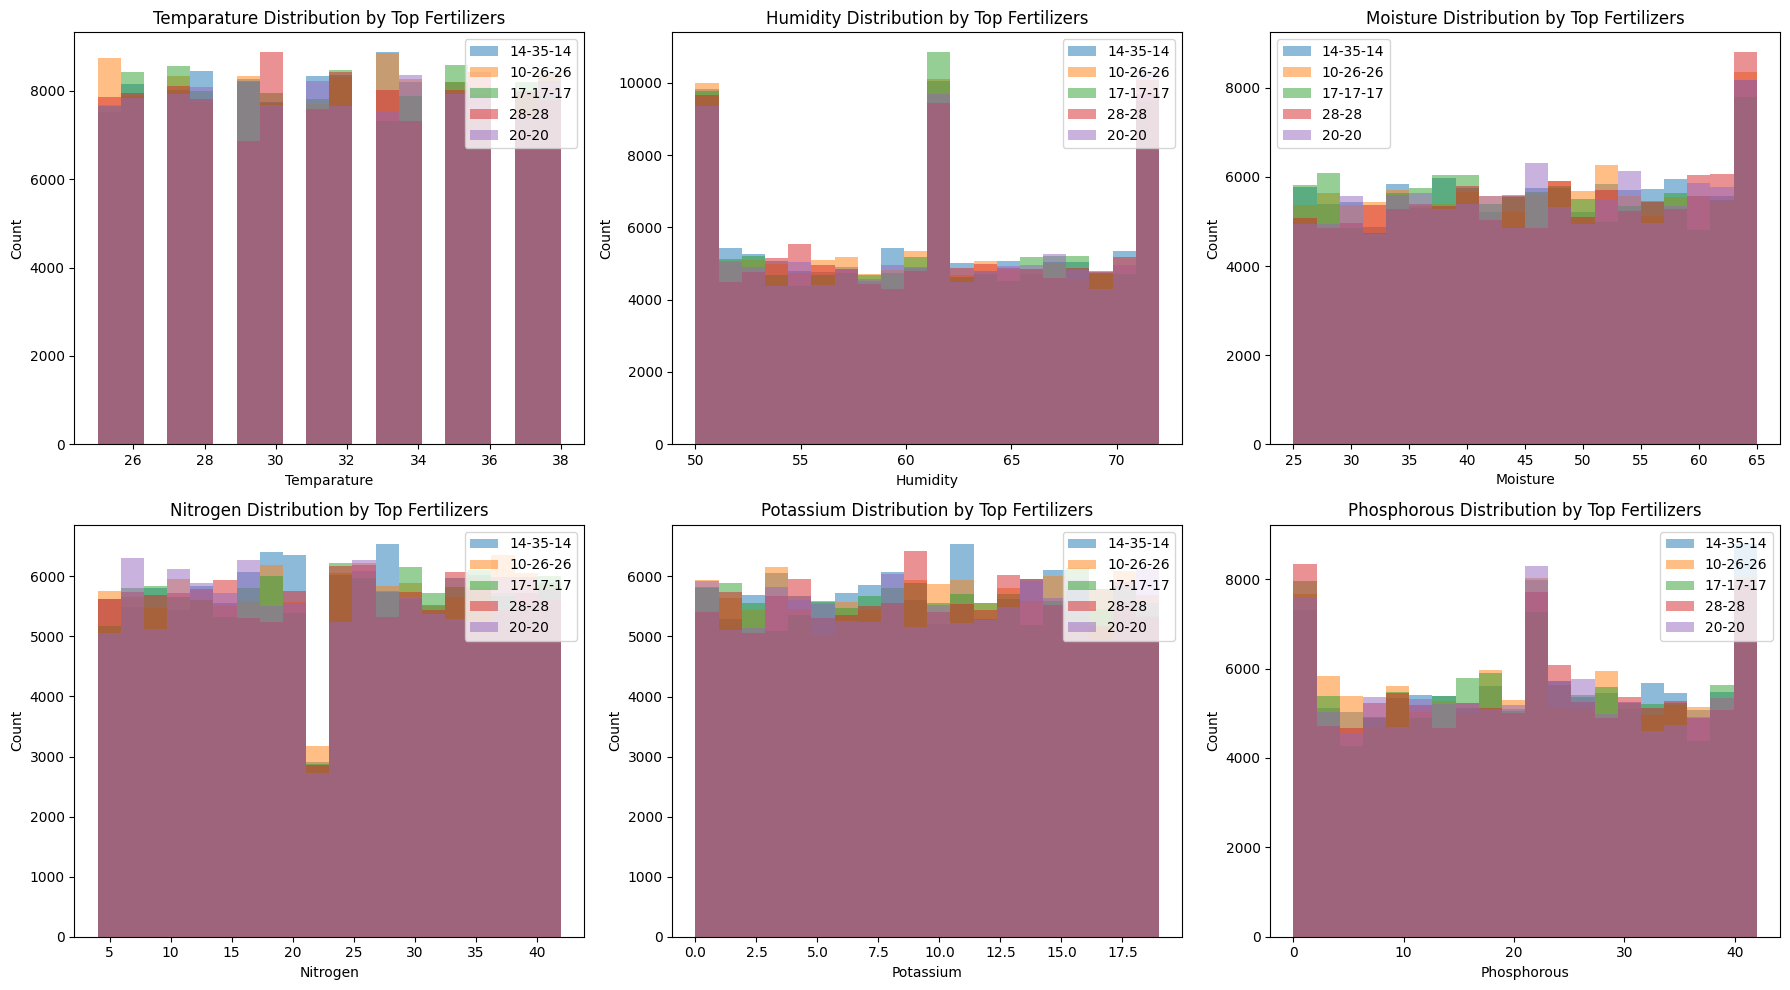

In [4]:
# Analyze relationships between features and target
print("=== FEATURE-TARGET RELATIONSHIPS ===")

# For each categorical feature, see how it relates to target
for col in categorical_features:
    print(f"\n{col} vs Fertilizer Name:")
    crosstab = pd.crosstab(train[col], train['Fertilizer Name'], normalize='index')
    print(f"Shape: {crosstab.shape}")
    
    # Show top fertilizers for each category
    for cat in train[col].unique():
        top_ferts = crosstab.loc[cat].nlargest(3).index.tolist()
        print(f"  {cat}: {top_ferts}")

# Analyze numerical feature distributions by target
print(f"\n=== NUMERICAL FEATURES BY TARGET ===")
sample_targets = target_counts.head(5).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    for target in sample_targets:
        subset = train[train['Fertilizer Name'] == target][feature]
        axes[i].hist(subset, alpha=0.5, label=target, bins=20)
    
    axes[i].set_title(f'{feature} Distribution by Top Fertilizers')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [5]:
# Check for feature interactions that winning solutions might have exploited
print("=== FEATURE INTERACTION ANALYSIS ===")

# NPK relationships
print("NPK Relationships:")
train['NPK_sum'] = train['Nitrogen'] + train['Potassium'] + train['Phosphorous']
train['NPK_ratio'] = train['Nitrogen'] / (train['Potassium'] + train['Phosphorous'] + 1)

# See if NPK ratios are strong predictors
for target in sample_targets:
    subset = train[train['Fertilizer Name'] == target]
    print(f"\n{target}:")
    print(f"  NPK_sum: mean={subset['NPK_sum'].mean():.2f}, std={subset['NPK_sum'].std():.2f}")
    print(f"  NPK_ratio: mean={subset['NPK_ratio'].mean():.2f}, std={subset['NPK_ratio'].std():.2f}")

# Environmental interactions
train['Temp_Humidity'] = train['Temparature'] * train['Humidity']
train['Temp_Moisture'] = train['Temparature'] * train['Moisture']
train['Humidity_Moisture'] = train['Humidity'] * train['Moisture']

print(f"\nEnvironmental interactions:")
for target in sample_targets:
    subset = train[train['Fertilizer Name'] == target]
    print(f"\n{target}:")
    print(f"  Temp_Humidity: mean={subset['Temp_Humidity'].mean():.2f}")
    print(f"  Temp_Moisture: mean={subset['Temp_Moisture'].mean():.2f}")
    print(f"  Humidity_Moisture: mean={subset['Humidity_Moisture'].mean():.2f}")

=== FEATURE INTERACTION ANALYSIS ===
NPK Relationships:

14-35-14:
  NPK_sum: mean=53.98, std=17.70
  NPK_ratio: mean=1.02, std=1.37

10-26-26:
  NPK_sum: mean=53.74, std=17.66
  NPK_ratio: mean=1.04, std=1.43

17-17-17:
  NPK_sum: mean=53.78, std=17.63
  NPK_ratio: mean=1.06, std=1.57



28-28:
  NPK_sum: mean=53.52, std=17.57
  NPK_ratio: mean=1.05, std=1.48

20-20:
  NPK_sum: mean=53.71, std=17.61
  NPK_ratio: mean=1.03, std=1.43

Environmental interactions:

14-35-14:
  Temp_Humidity: mean=1923.12
  Temp_Moisture: mean=1422.89
  Humidity_Moisture: mean=2749.64

10-26-26:
  Temp_Humidity: mean=1917.80
  Temp_Moisture: mean=1418.29
  Humidity_Moisture: mean=2747.24



17-17-17:
  Temp_Humidity: mean=1919.35
  Temp_Moisture: mean=1407.39
  Humidity_Moisture: mean=2728.98

28-28:
  Temp_Humidity: mean=1923.17
  Temp_Moisture: mean=1434.02
  Humidity_Moisture: mean=2776.54

20-20:
  Temp_Humidity: mean=1925.55
  Temp_Moisture: mean=1427.90
  Humidity_Moisture: mean=2769.09


In [6]:
# Analyze if numerical features should be treated as categorical
print("=== NUMERICAL FEATURES AS CATEGORICAL ===")

# Check unique values and distributions
for col in numerical_features:
    print(f"\n{col}:")
    print(f"  Unique values: {train[col].nunique()}")
    print(f"  Range: {train[col].min()} - {train[col].max()}")
    
    # Check if values are discrete (could be treated as categorical)
    if train[col].nunique() < 50:
        print(f"  ⚠️  Low cardinality - could be treated as categorical")
        print(f"  Value counts: {train[col].value_counts().head()}")
    else:
        print(f"  High cardinality - better as numerical or binned")

# Test binning strategy (as mentioned in winning solutions)
print(f"\n=== BINNING STRATEGY TEST ===")
for col in numerical_features:
    # Try different binning strategies
    for n_bins in [5, 10, 15, 20]:
        binned = pd.cut(train[col], bins=n_bins, labels=False)
        print(f"{col} - {n_bins} bins: {binned.nunique()} unique values")
    print()

=== NUMERICAL FEATURES AS CATEGORICAL ===

Temparature:
  Unique values: 14
  Range: 25 - 38
  ⚠️  Low cardinality - could be treated as categorical
  Value counts: Temparature
27    55228
35    54855
32    54656
30    53867
34    53788
Name: count, dtype: int64

Humidity:
  Unique values: 23
  Range: 50 - 72
  ⚠️  Low cardinality - could be treated as categorical
  Value counts: Humidity
70    33745
53    33640
62    33617
71    33525
64    33446
Name: count, dtype: int64

Moisture:
  Unique values: 41
  Range: 25 - 65
  ⚠️  Low cardinality - could be treated as categorical
  Value counts: Moisture
61    19809
48    19386
47    19299
53    19270
46    19180
Name: count, dtype: int64

Nitrogen:
  Unique values: 39
  Range: 4 - 42
  ⚠️  Low cardinality - could be treated as categorical
  Value counts: Nitrogen
25    20484
11    20283
38    20269
26    20177
24    20122
Name: count, dtype: int64

Potassium:
  Unique values: 20
  Range: 0 - 19
  ⚠️  Low cardinality - could be treated as c

Temparature - 10 bins: 10 unique values
Temparature - 15 bins: 14 unique values
Temparature - 20 bins: 14 unique values

Humidity - 5 bins: 5 unique values
Humidity - 10 bins: 10 unique values


Humidity - 15 bins: 15 unique values
Humidity - 20 bins: 20 unique values

Moisture - 5 bins: 5 unique values


Moisture - 10 bins: 10 unique values
Moisture - 15 bins: 15 unique values
Moisture - 20 bins: 20 unique values

Nitrogen - 5 bins: 5 unique values
Nitrogen - 10 bins: 10 unique values


Nitrogen - 15 bins: 15 unique values
Nitrogen - 20 bins: 20 unique values

Potassium - 5 bins: 5 unique values


Potassium - 10 bins: 10 unique values
Potassium - 15 bins: 15 unique values
Potassium - 20 bins: 20 unique values

Phosphorous - 5 bins: 5 unique values
Phosphorous - 10 bins: 10 unique values


Phosphorous - 15 bins: 15 unique values
Phosphorous - 20 bins: 20 unique values



In [7]:
# Check for data augmentation opportunities
print("=== DATA AUGMENTATION ANALYSIS ===")

# Analyze if we can identify original vs synthetic patterns
# Based on winning solutions, original dataset had different characteristics

# Check distributions for potential synthetic artifacts
print("Potential synthetic data patterns:")
for col in numerical_features:
    # Check for uniform distributions (common in synthetic data)
    value_counts = train[col].value_counts().sort_index()
    uniformity_score = len(value_counts) / (train[col].max() - train[col].min() + 1)
    print(f"  {col}: uniformity={uniformity_score:.3f} (1.0=perfectly uniform)")
    
    if uniformity_score > 0.8:
        print(f"    ⚠️  Highly uniform - likely synthetic")
    else:
        print(f"    ✓ More natural distribution")

# Check correlations - synthetic data often has cleaner patterns
print(f"\nFeature correlations:")
corr_matrix = train[numerical_features].corr()
print(corr_matrix)

# Check if we can create pseudo-original data by adding noise
print(f"\n=== PSEUDO-ORIGINAL DATA GENERATION ===")
# Winning solutions weighted original data 4x higher
# We can simulate this by creating noisy versions of the data
original_weight = 4  # From 2nd place solution
synthetic_weight = 1

print(f"Recommended weighting: original:synthetic = {original_weight}:{synthetic_weight}")
print(f"This means we should create {original_weight} copies of 'original-like' data")

# For now, we'll note this as a strategy to implement

=== DATA AUGMENTATION ANALYSIS ===
Potential synthetic data patterns:
  Temparature: uniformity=1.000 (1.0=perfectly uniform)
    ⚠️  Highly uniform - likely synthetic
  Humidity: uniformity=1.000 (1.0=perfectly uniform)
    ⚠️  Highly uniform - likely synthetic
  Moisture: uniformity=1.000 (1.0=perfectly uniform)
    ⚠️  Highly uniform - likely synthetic
  Nitrogen: uniformity=1.000 (1.0=perfectly uniform)
    ⚠️  Highly uniform - likely synthetic
  Potassium: uniformity=1.000 (1.0=perfectly uniform)
    ⚠️  Highly uniform - likely synthetic
  Phosphorous: uniformity=1.000 (1.0=perfectly uniform)
    ⚠️  Highly uniform - likely synthetic

Feature correlations:


             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.001758 -0.001633 -0.006073  -0.009913     0.000298
Humidity        0.001758  1.000000  0.003424  0.006502   0.005229     0.002413
Moisture       -0.001633  0.003424  1.000000  0.003016  -0.001931    -0.006735
Nitrogen       -0.006073  0.006502  0.003016  1.000000   0.000543    -0.005464
Potassium      -0.009913  0.005229 -0.001931  0.000543   1.000000     0.000113
Phosphorous     0.000298  0.002413 -0.006735 -0.005464   0.000113     1.000000

=== PSEUDO-ORIGINAL DATA GENERATION ===
Recommended weighting: original:synthetic = 4:1
This means we should create 4 copies of 'original-like' data


In [8]:
# Summary of findings for strategy development
print("=== STRATEGY SUMMARY ===")
print("\n1. FEATURE ENGINEERING OPPORTUNITIES:")
print("   ✓ Treat numerical features as categorical (binning)")
print("   ✓ NPK interaction features (product, ratios, sums)")
print("   ✓ Environmental interaction features (Temp×Humidity, etc.)")
print("   ✓ Soil-Crop type interactions")
print("   ✓ Target encoding for high-cardinality interactions")

print("\n2. DATA CHARACTERISTICS:")
print("   ✓ 750K training samples, 250K test samples")
print("   ✓ 5 main fertilizer classes (well-balanced)")
print("   ✓ Low cardinality numerical features (good for categorical treatment)")
print("   ✓ No unseen categories in test set")

print("\n3. WINNING SOLUTION INSIGHTS:")
print("   ✓ Treat ALL features as categorical (key insight)")
print("   ✓ Use shallower trees (depth 7-8)")
print("   ✓ Weight original dataset 4x higher")
print("   ✓ Build diverse ensemble (50-60 models)")
print("   ✓ Use stacking/hill climbing")

print("\n4. NEXT STEPS:")
print("   1. Implement categorical treatment for all features")
print("   2. Add interaction features")
print("   3. Create data augmentation strategy")
print("   4. Build diverse model zoo")
print("   5. Implement proper validation (no leakage)")

=== STRATEGY SUMMARY ===

1. FEATURE ENGINEERING OPPORTUNITIES:
   ✓ Treat numerical features as categorical (binning)
   ✓ NPK interaction features (product, ratios, sums)
   ✓ Environmental interaction features (Temp×Humidity, etc.)
   ✓ Soil-Crop type interactions
   ✓ Target encoding for high-cardinality interactions

2. DATA CHARACTERISTICS:
   ✓ 750K training samples, 250K test samples
   ✓ 5 main fertilizer classes (well-balanced)
   ✓ Low cardinality numerical features (good for categorical treatment)
   ✓ No unseen categories in test set

3. WINNING SOLUTION INSIGHTS:
   ✓ Treat ALL features as categorical (key insight)
   ✓ Use shallower trees (depth 7-8)
   ✓ Weight original dataset 4x higher
   ✓ Build diverse ensemble (50-60 models)
   ✓ Use stacking/hill climbing

4. NEXT STEPS:
   1. Implement categorical treatment for all features
   2. Add interaction features
   3. Create data augmentation strategy
   4. Build diverse model zoo
   5. Implement proper validation (no le